# Hierarchy embedding in math

In [90]:
# Setup the environement

import nengo
import nengo.spa as spa
from nengo.spa import Vocabulary
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
# Construct the embeddings using HRRs

rng = np.random.RandomState(12)
dim = 64

vocab = Vocabulary(dimensions=dim, rng=rng, max_similarity=0.02, unitary=True)

incr = vocab.parse("INCREMENT")
zero = vocab.parse("ZERO")
sex = vocab.parse("SEX")

vocab.add("ONE", vocab.parse("ZERO*INCREMENT+SEX*MALE+B"))
vocab.add("SIX", vocab.parse("ZERO*INCREMENT+SEX*FEMALE+G"))

vocab.add("TWO", vocab.parse("ONE*INCREMENT+SEX*MALE+C"))
vocab.add("SEVEN", vocab.parse("ONE*INCREMENT+SEX*FEMALE+H"))

vocab.add("THREE", vocab.parse("TWO*INCREMENT+SEX*FEMALE+D"))
vocab.add("FOUR", vocab.parse("THREE*INCREMENT+SEX*MALE+E"))
vocab.add("FIVE", vocab.parse("FOUR*INCREMENT+SEX*FEMALE+F"))

vocab.add("EIGHT", vocab.parse("SEVEN*INCREMENT+SEX*FEMALE+I"))
vocab.add("TEN", vocab.parse("EIGHT*INCREMENT+SEX*MALE+K"))

vocab.add("NINE", vocab.parse("SEVEN*INCREMENT+SEX*MALE+J"))
vocab.add("ELEVEN", vocab.parse("NINE*INCREMENT+SEX*MALE+L"))

vocab.add("TWELVE", vocab.parse("SIX*INCREMENT+SEX*MALE+M"))
vocab.add("THIRTEEN", vocab.parse("SIX*INCREMENT+SEX*FEMALE+N"))


one = vocab.parse("ONE")
two = vocab.parse("TWO")
three = vocab.parse("THREE")
four = vocab.parse("FOUR")
five = vocab.parse("FIVE")
six = vocab.parse("SIX")
seven = vocab.parse("SEVEN")
eight = vocab.parse("EIGHT")
nine = vocab.parse("NINE")
ten = vocab.parse("TEN")

In [92]:
# Compute the transformation and convert it into a SP object
T = (~zero*one + ~one*two + ~zero*six).v / 3
T = spa.SemanticPointer(T)

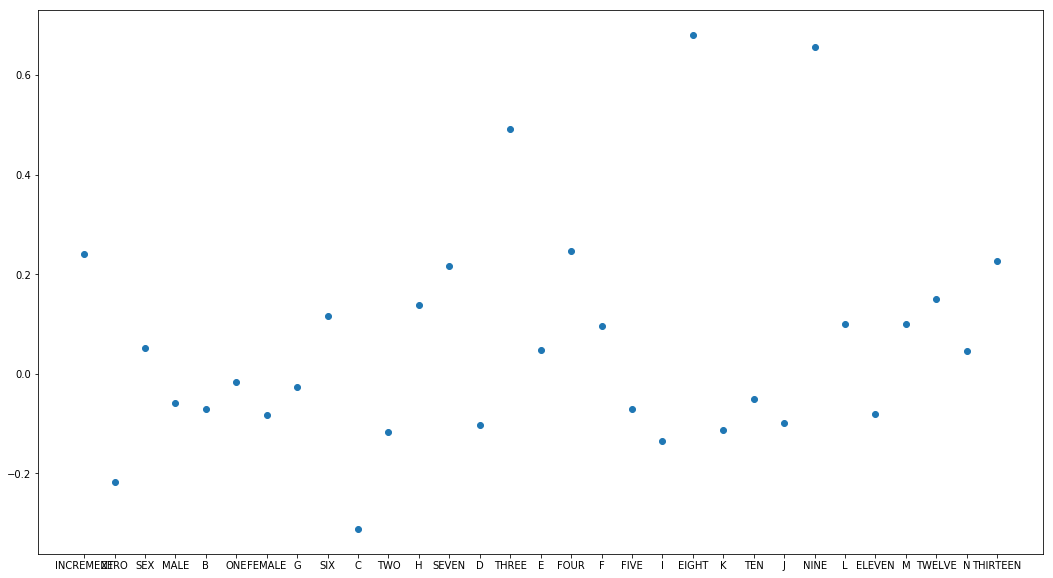

In [93]:
# Test the model using the computed transformation

succ = (seven * T)
mal_fem = ~sex * succ
test = succ

similarity = []
for sp_name in vocab.keys:
    vec = vocab.parse(sp_name)
    similarity.append(vec.compare(test))
   
plt.figure(figsize = (18,10))    
plt.plot(vocab.keys, similarity, 'o', label=vocab.keys)   

The vector representing the successor of seven is most similar to eight and nine.